In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# What is neural network?

In each hemisphere of our brain, humans have a primary visual cortex, also known as V1, containing 140 million neurons, with tens of billions of connections between them. And yet human vision involves not just V1, but an entire series of visual cortices - V2, V3, V4, and V5 - doing progressively more complex image processing. We carry in our heads a supercomputer, tuned by evolution over hundreds of millions of years, and superbly adapted to understand the visual world. 

## Perceptron

What is a neural network? To get started, I'll explain a type of artificial neuron called a perceptron. Perceptrons were developed in the 1950s and 1960s by the scientist Frank Rosenblatt, inspired by earlier work by Warren McCulloch and Walter Pitts. Today, it's more common to use other models of artificial neurons.

So how do perceptrons work? A perceptron takes several binary inputs x1, x2, x3 and produces a single binary output...

<img src='images/tikz0.png' />

In the example shown the perceptron has three inputs x1, x2, x3. In general it could have more or fewer inputs. Rosenblatt proposed a simple rule to compute the output. He introduced weights, w1, w2, w3 real numbers expressing the importance of the respective inputs to the output. The neuron's output, 0 or 1, is determined by whether the weighted sum $$\sum{wj * xj}$$ is less than or greater than some threshold value.

The perceptron isn't a complete model of human decision-making! But what the example illustrates is how a perceptron can weigh up different kinds of evidence in order to make decisions. And it should seem plausible that a complex network of perceptrons could make quite subtle decisions.

<img src='images/tikz1.png' />

In this network, the first column of perceptrons - what we'll call the first layer of perceptrons - is making three very simple decisions, by weighing the input evidence. What about the perceptrons in the second layer? Each of those perceptrons is making a decision by weighing up the results from the first layer of decision-making. In this way a perceptron in the second layer can make a decision at a more complex and more abstract level than perceptrons in the first layer. And even more complex decisions can be made by the perceptron in the third layer. In this way, a many-layer network of perceptrons can engage in sophisticated decision making.

A small change in the weights or bias of any single perceptron in the network can sometimes cause the output of that perceptron to completely flip, say from 0 to 1. That flip may then cause the behaviour of the rest of the network to completely change in some very complicated way. We can overcome this problem by introducing a new type of artificial neuron called a sigmoid neuron. Sigmoid neurons are similar to perceptrons, but modified so that small changes in their weights and bias cause only a small change in their output.

$$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^- \theta^Tx }  $$ 

## Backpropagation

The backpropagation algorithm was originally introduced in the 1970s, but its importance wasn't fully appreciated until a <a href='http://www.nature.com/nature/journal/v323/n6088/pdf/323533a0.pdf'>famous 1986 paper </a> by David Rumelhart, Geoffrey Hinton, and Ronald Williams. That paper describes several neural networks where backpropagation works far faster than earlier approaches to learning, making it possible to use neural nets to solve problems which had previously been insoluble. Today, the backpropagation algorithm is the workhorse of learning in neural networks.

Understanding of mathmatically calculation of backpropagation
https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

## Now let's build neural network using Tensorflow & Keras (Tensorflow is a Deep learning framework developed by Google)

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

60000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore dataset

In [5]:
print("The dimension of the train dataset is {}".format(train_images.shape))

The dimension of the train dataset is (60000, 28, 28)


In [6]:
print("Number of training records {}".format(len(train_images)))

Number of training records 60000


In [7]:
print("List of our label classes {}".format(list(np.unique(train_labels))))

List of our label classes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
print("The dimension of the train dataset is {}".format(test_images.shape))

The dimension of the train dataset is (10000, 28, 28)


In [9]:
print("Number of training records {}".format(len(test_labels)))

Number of training records 10000


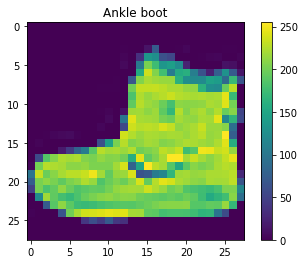

In [10]:
# Let's try to print one of the training images
plt.figure()
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

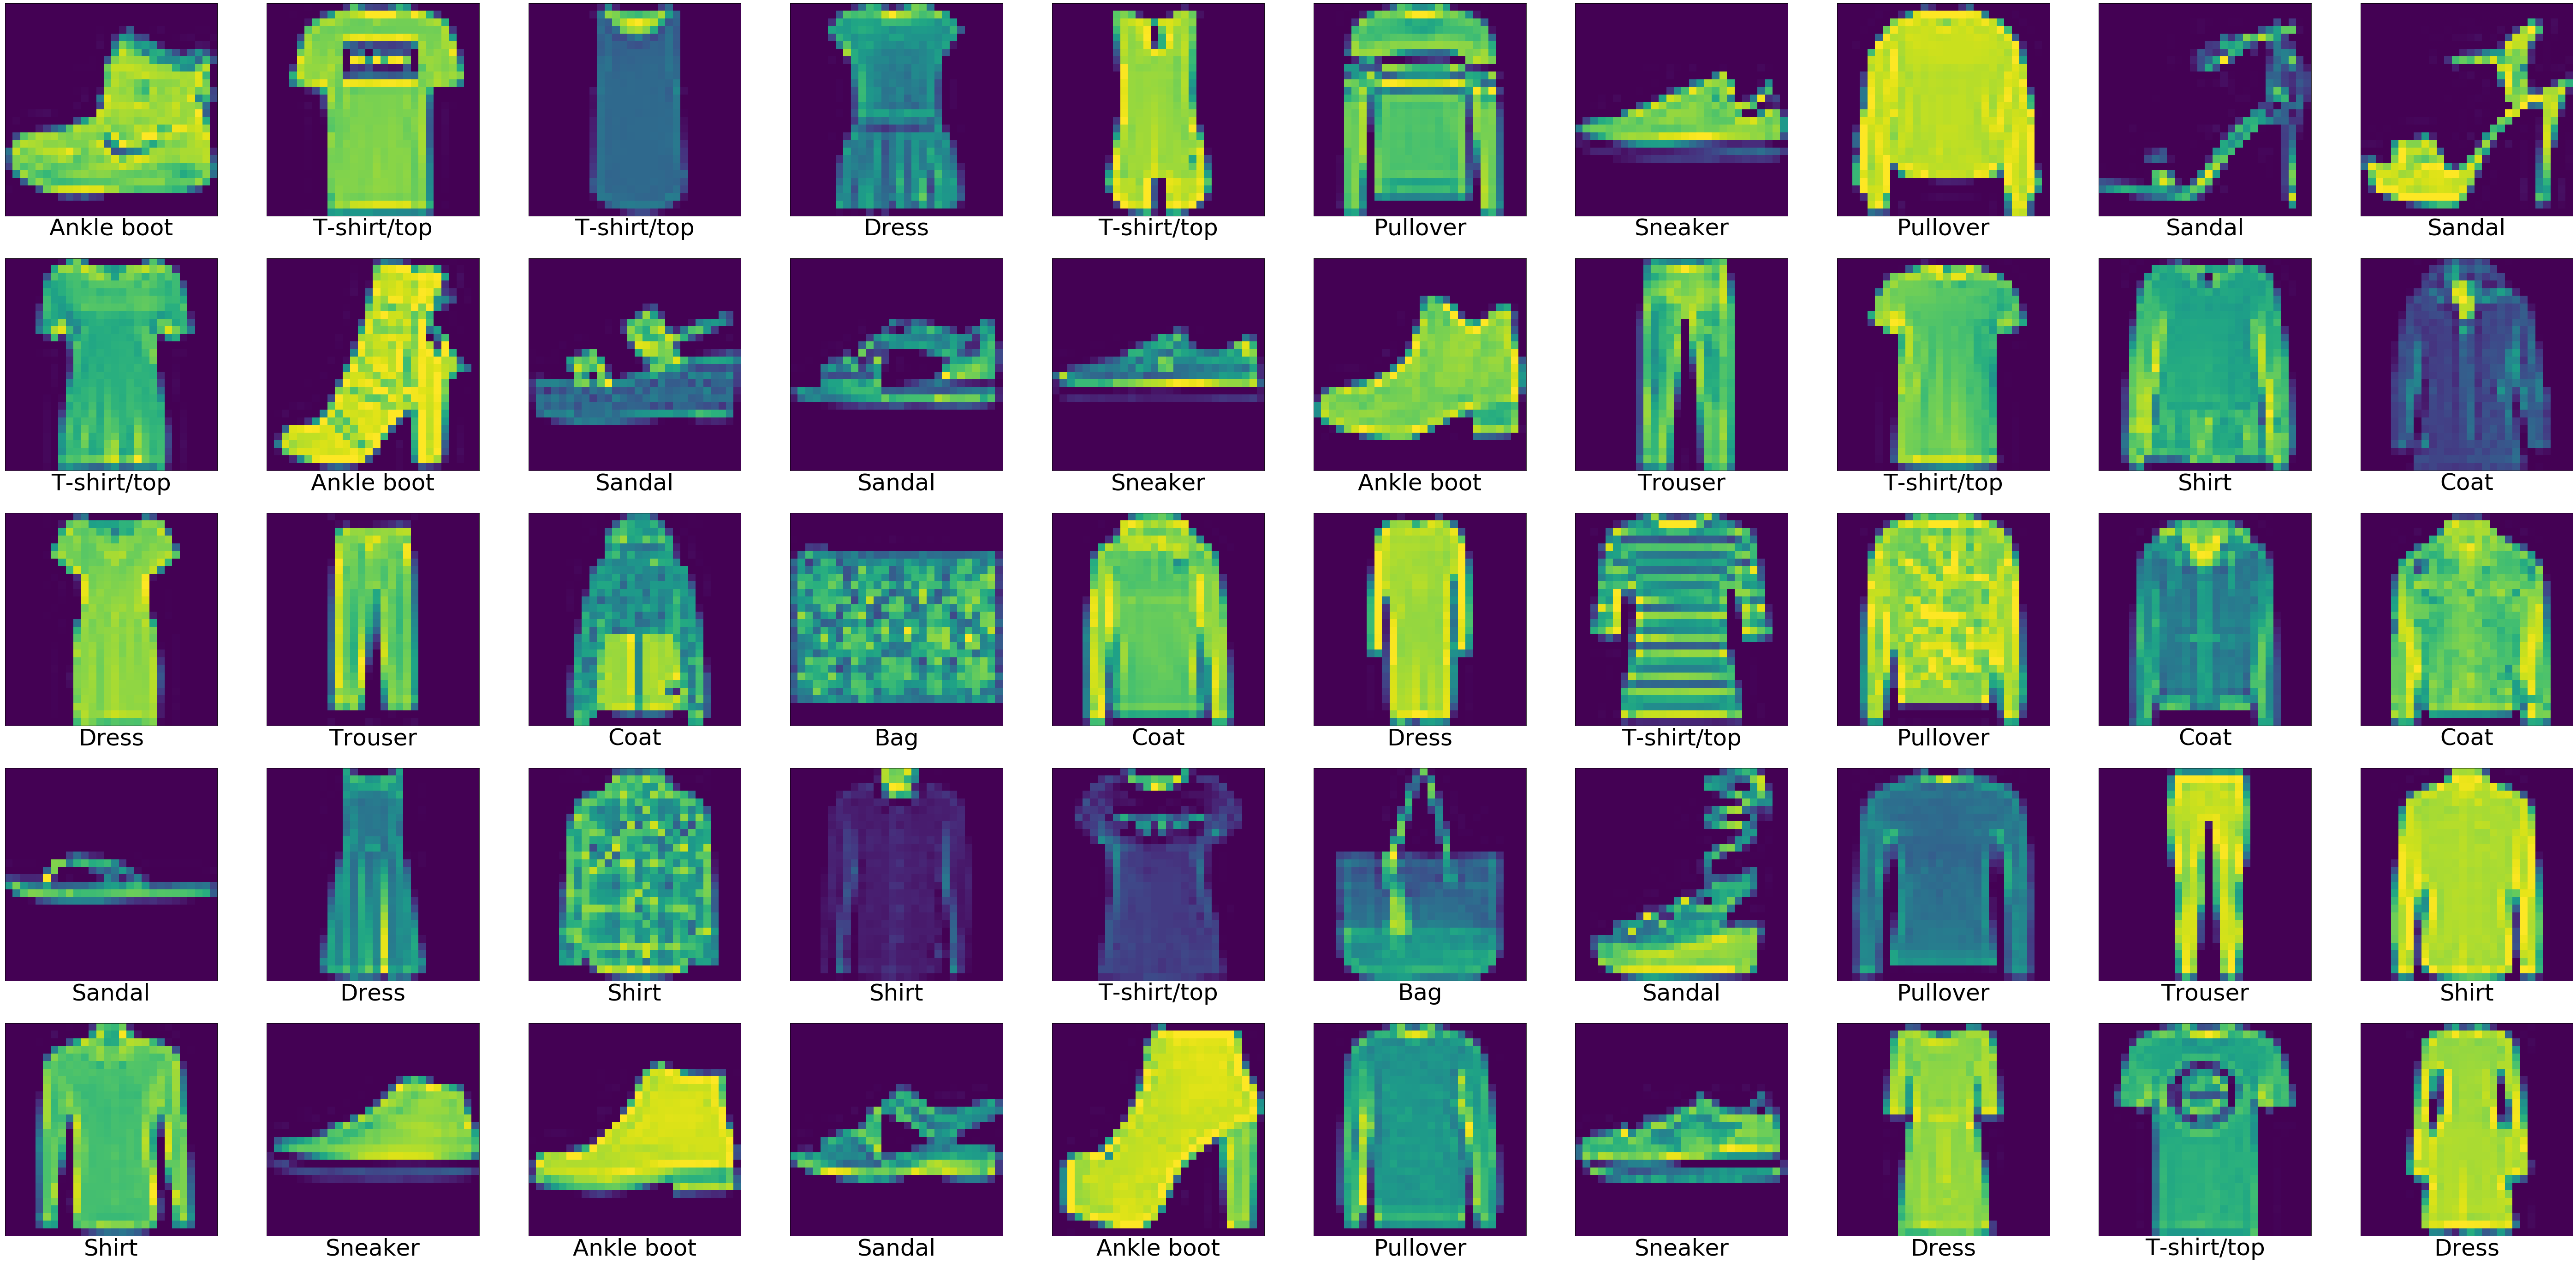

In [11]:
# Let's try to print 50 of the training images
plt.figure(figsize=(100, 100))

for i in range(50):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]], fontsize=50)
plt.show()

In [12]:
# Normalize the input data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
# Now lets build our first neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
# It gives us idea about the number of layers & at each layer how many parameters being used...
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Begin the training now...
model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 51us/sample - loss: 1.6790 - accuracy: 0.7910 - val_loss: 1.6275 - val_accuracy: 0.8370
Epoch 2/10
54000/54000 [==============================] - 2s 44us/sample - loss: 1.6200 - accuracy: 0.8436 - val_loss: 1.6116 - val_accuracy: 0.8520
Epoch 3/10
54000/54000 [==============================] - 2s 44us/sample - loss: 1.6085 - accuracy: 0.8536 - val_loss: 1.6126 - val_accuracy: 0.8522
Epoch 4/10
54000/54000 [==============================] - 2s 44us/sample - loss: 1.6014 - accuracy: 0.8611 - val_loss: 1.6111 - val_accuracy: 0.8517
Epoch 5/10
54000/54000 [==============================] - 2s 44us/sample - loss: 1.5958 - accuracy: 0.8664 - val_loss: 1.5972 - val_accuracy: 0.8648
Epoch 6/10
54000/54000 [==============================] - 2s 43us/sample - loss: 1.5912 - accuracy: 0.8710 - val_loss: 1.6029 - val_accuracy: 0.8578
Epoch 7/10
54000/54000 [==============================] -

In [16]:
# Check the performs of the model on the unknown records...
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.8654


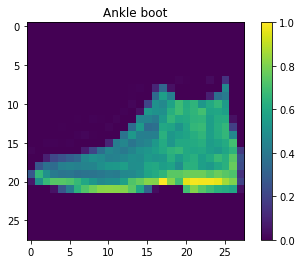

In [17]:
# How to perform prediction on single image & used inside package for inferences...
predictions = model.predict(test_images[0:1])
plt.figure()
plt.imshow(test_images[0])
plt.title(class_names[np.argmax(predictions)])
plt.colorbar()
plt.grid(False)
plt.show()